# Глава 1

1. `Какие числовые признаки называются дискретными, а какие — непрерывными? Приведите собственные примеры.`
- Дискретные числовые признаки - те, которые невозможно измерить, но можно посчитать? например: **Кол-во учитилей в университете**.
- Непрервные - те, которые можно измерить и они имеют бесконечное множество возможных значений в определенном интервале например: **температура воздуха**.
2. `Опишите разницу между обучением с учителем и обучением без учителя.`
- Обучение с учителем: Если у вас есть данные с известными метками и вы хотите построить модель для прогнозирования новых данных.
- Обучение без учителя: Если у вас есть большие объемы неразмеченных данных и вы хотите найти скрытые закономерности или сжать данные.
3. `Опишите разницу между задачами классификации и регрессии.`
- Классификация - предсказывает (да/нет)
- Регрессия - предсказывает обычно число, например температуру воздуха
4. `Если вас попросят создать программу, которая будет определять кошку или собаку по изображению, к какому типу задач машинного обучения относится эта просьба?`
- классификации
5. `Почему в качестве альтернативы простому использованию всех тренировочных данных рекомендуется выполнять проверку модели на валидационных данных?`
-  Оно позволяет избежать переобучения, выбрать оптимальные гиперпараметры и получить более надежную оценку качества модели.
6. `Даны три матрицы A, B, C. Матрица A имеет размеры 5 × 4, B — размеры 4 × 6, C имеет размеры 3 × 5. Укажите все возможные матрицы, которые можно перемножить между собой.`
- А х B и С х А т.к. число стлобцов должно развнятся числу строк второй
7. `Найти градиент функции` f(x,y,z) = yx^2 + ln(y) + e^(-z)
- Для x - 2xy, для y - 1/y + x^2, z - -e^-z. 
8. `Найдите частные производные сложной функции E = (y' - y)^2 y = wx + b по переменным w и b`
- w = m - 2*(m*x + b - y)*x
- b = u - 2*(m*x + u - y)
9. `Найдите частные производные сложной функции E = yln(y') + (1 - y)*ln(1 - y'), y' = 1 / (1 + e^-z)`
- (d/dz)*E = (y*ln(x)/1+(e^-z))+ (1 - y)*ln(x)*(1 - 1/(1 + e^-z))



# Глава 2

In [2]:
import pandas as pd
import numpy as np

1. Допустим, у вас есть файл с данными, который называется ‘iris. csv’. Этот файл находится в папке ‘/data/’. Вы открываете его в текстовом редакторе и видите следующие первые строки: sepal length in cm; sepal width in cm; petal length in cm; petal width in cm; class 5.1; 3.5; 1.4; 0.2; 0 Как должна выглядеть команда для считывания данных в да- тафрейм Pandas?

In [ ]:
pd.read_csv('/data/iris.csv', delimiter = ';')

2. Для набора данных Cars после удаления дубликатов выберите из полного датафрейма строки с индекса 69 по 322. Отсорти- руйте полученный датафрейм по колонке ‘Distance’ по убы- ванию. Какое значение колонки ‘Style’ у полученного датаф- рейма во второй строке сверху?

In [3]:
df = pd.read_csv('./cars.csv', delimiter = ',')
DF = df.drop_duplicates()
DF = DF.reset_index(drop=True)
DF.loc[69:322,:].sort_values(by = 'Distance', ascending= False).head(5)
# Ответ: Minivan

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
281,Renault,Megane,2004,Hatchback,79593986.0,1600.0,Petrol,Manual,1050.0
138,Citroen,Berlingo,2001,Minivan,68286164.0,1900.0,Diesel,Manual,2050.0
223,Volkswagen,Passat CC,1994,Sedan,68204075.0,1800.0,Petrol,Manual,1550.0
218,Opel,Zafira,2002,Minivan,11111111.0,2000.0,Metan/Propan,Manual,3700.0
276,Vaz,2121niva,1982,Hatchback,1563215.0,1600.0,Petrol,Manual,1050.0


3. Для набора данных Cars оцените количество строк, которые были удалены после анализа гистограмм распределения и удаления аномальных значений.

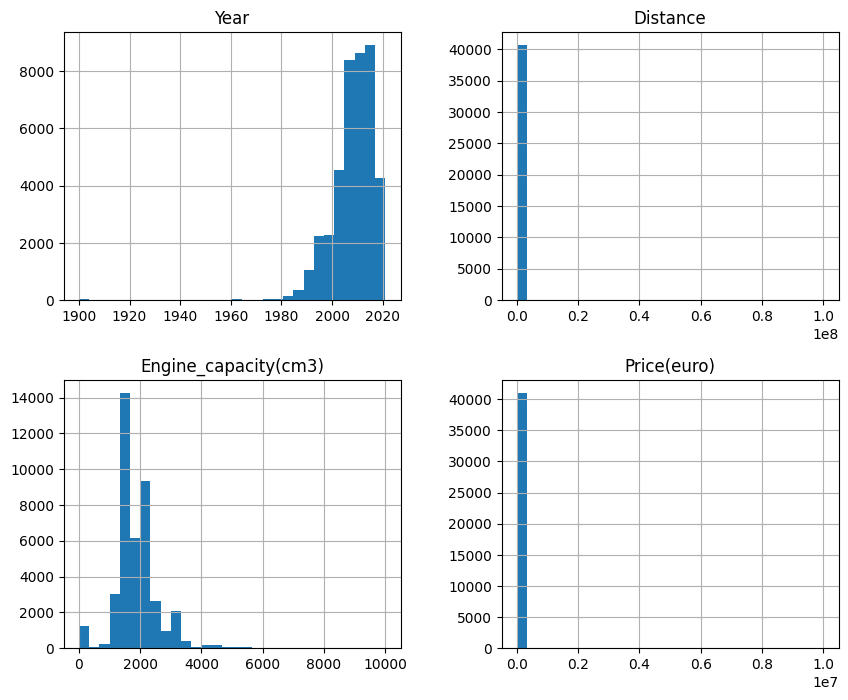

Количество удалённых строк: 1046


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cars.csv', delimiter=',')

df.hist(bins=30, figsize=(10, 8))
plt.show()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std() 
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
                                                               

original_row_count = pd.read_csv('cars.csv').shape[0]
remaining_row_count = df.shape[0]
deleted_row_count = original_row_count - remaining_row_count

print(f"Количество удалённых строк: {deleted_row_count}")

4. Для набора данных Cars назовите самую распространенную марку автомобилей (столбец Make)

In [5]:
counts = df.Make.value_counts()
counts
# Ответ Volksvagen

Make
Volkswagen      4304
Mercedes        3811
Toyota          3776
BMW             3221
Renault         2988
                ... 
Lamborghini        1
McLaren            1
Saturn             1
Aston Martin       1
Xpeng              1
Name: count, Length: 87, dtype: int64

5. Визуализируйте скаттерограмму для двух столбцов — Distance и Year — набора данных Cars с использованием столбца Transmission в качестве цвета маркера (hue). К какому типу Transmission относится точка, которая наиболее близка к ко- ординатам (Year = 1980, Distance = 500 000)?

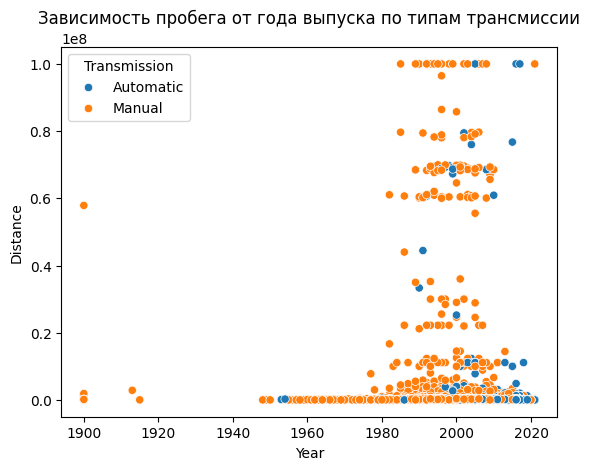

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cars_df = pd.read_csv('./cars.csv', delimiter=',')

sns.scatterplot(data=cars_df, x='Year', y='Distance', hue='Transmission')
plt.title('Зависимость пробега от года выпуска по типам трансмиссии')
plt.show()

target_point = (1980, 500000)
cars_df['distance_to_target'] = ((cars_df['Year'] - target_point[0])**2 + (cars_df['Distance'] - target_point[1])**2)**0.5
nearest_point = cars_df.loc[cars_df['distance_to_target'].idxmin()]

6. `Представим, что вы визуализировали некий набор данных
Какие новые признаки, основанные на имеющихся, необходимо сконструировать, чтобы иметь возможность отделить все красные точки от всех синих точек с помощью прямой линии?`

Ответ:
- Для левого графика где данные уже разделены на четыре четких кластера, можно использовать комбинации существующих признаков, например, их произведение или отношение. Это позволит создать новые оси координат, вдоль которых кластеры будут расположены более линейно.
- Для правого графика можно перейти к полярным координатам

# Глава 3

1. Перечислите возможные гиперпараметры модели линейной регрессии.
	1. **Алгоритм оптимизации(градиентный спуск) Функция потерь(Среднеквадратическая ошибка), тип регуляризации(L1, L2)**
2. Может ли коэффициент детерминации быть отрицательнымчислом?
	1. **нет поскольку это доля дисперсии R^2**
3. Оцените MSE для следующих данных: реальные значения y {1, 2, 3, 4}, предсказания модели y {2, 1, 4, 6}.
	1. **MSE= сумма квадратов разностей/кол-во=7/4=1.75**
4. Предположим, что у вас есть вектор весов w {10, 5, 6}. Вы посчитали градиент функции потерь, который равен {20, −10, 40}. Посчитайтwuе обновленный вектор весов при условии, что скорость обучения составляет 0.1.
	1. **{10-0.1*20, 5 - 0.1*(-10), 6 - 0.1*40}, {8, 6, 2}**
5. Перечислите данные, которые вам необходимы для расчета градиента функции потерь.
	1. **вектор предсказанных значений, вектор правильных значений, массив признаков и флаг bias**
6. Вы выполнили обучение линейной модели дважды: с регуляризацией и без. У вас есть два вектора весов модели w1 {14.37, 22.80, 32.20} и w2 {0.69, 2.02, 4.20}, но вы не помните, какой вектор весов какой модели соответствует. Как вы считаете, который из приведенных весов соответствует случаю регуляризации?
	1. **w2 т.к. регуляризация обычно стремится к небольшим значениям весов**
7. Вы получили веса модели w {3, −2, 2}. В модели не используется смещение. Оцените предсказание модели для следующих значений параметров x {1, 3, 1}.
	1. **y = w1*x1 + w2*x2 + ... + wn*xn, y = 3*1 + (-2)*3 + 2*1 = 3 - 6 + 2 = -1**
8. Оцените коэффициент детерминации для следующих данных: реальные значения y {1, 2, 3, 4}, предсказания модели y {2, 1, 4, 6}.
	1. **R² = 1 - (сумма квадратов различий между реальным или предсказанными значениями / общая сумма квадратов отклонений реальных значений от их среднего) => 1 - (7 / 5) = -0.4**

# Глава 4

1. `Допустим, тест на некое заболевание R дал положительный ответ, хотя на самом деле у испытуемого нет этого заболевания. Какую ошибку допустил тест?`
- Ложная положительная ошибка
2. `Пусть в матрице ошибок TP = 5, TN = 90, FP = 10, FN = 5. Оцените метрики классификации для такой матрицы ошибок.`
- Accuracy = (5 + 90) / (5 + 90 + 10 + 5) = 0.864
- Precision = 5 / (5 + 10) = 0.333
- recall = 5 / (5 + 5) = 0.5
- Specificity = 90 / (90 + 10) = 0.9
- F1 measure = 2 * 0.333 * 0.5 / (0.333 + 0.5) = 0.4
3. `Допустим, есть два классификатора: первый классификатор имеет долю правильных ответов 95 %, чувствительность 99 %, специфичность 50 %; второй классификатор имеет долю правильных ответов 87 %, чувствительность 84 %, специфичность 94 %. Что вы можете сказать о данных, используемых для классификации? Какой из этих классификаторов надежнее (при условии, что важно определение обоих классов)?`
- вероятнее всего второй классификатор является более надежным для задачи, где важно определение обоих классов.
4. `Перечислите возможные гиперпараметры модели логистической регрессии`
- Порог классификации
- Функция потерь
- Метод оптимизации (градиент функции или ещё что-то...)
- Метод регуляризации (l1, l2)
5. `Для набора данных Cars проанализируйте веса моделей при ис- пользовании только числовых признаков. Назовите параметр, который в наибольшей степени связан с целевой переменной. Показать черновики`
- engine_capacity наиболее сильно влияет на целевую переменную Price т.к. имеет самый большой вес
6. `Оцените значение функции сигмоиды q(z) при z = 0.25`
- q(z) = 1/(1 + exp(-z)) => q(0.25) = 1/(1+ exp(-0.25)) = 0.5621765009
7. `Оцените значение производной функции сигмоиды σ'(z) для z = –3.`
- q(z) = 1/(1 + exp(-z)) => q(-3) = 1 / 1 + e^3 = 0.04
- q'(z) = (1-q(z))*q(z) = (1-0.95) = (1 - 0.04) * 0.04 = 0.03
8. `Назовите, к какому классу следует отнести результат логистической модели для z = 0.1, если порог равен 0.6.`
- к отрицательному т.к. q(0.1) = 0.52, что меньше чем 0.6.
9. `Оцените значение функции потерь (бинарной кросс-энтропии) для предсказания модели y = 0.1 и целевой переменной y = 1`

In [9]:
# Ответ на 9 вопрос
def bce_loss(yhat, y):
  eps = 1e-6
  return -(y*np.log(yhat + eps)+(1-y)*np.log(1-yhat+eps)).mean()

bce_loss(0.1, 1)
# Ответ 2.3

np.float64(2.3025750930440454)

# Глава 5

1. `Как связаны главные компоненты с исходными данными`
- Главные компоненты - это новые оси, которые мы строим на основе данных изначальных осей, чтобы найти направления наибольшей изменчиваости.

2. `Сделайте грубую оценку сжатия данных, если исходная матрица имела размерность (4250, 7), а при восстановлении исполь- зуются три главные компоненты.`
- 7 / 3 = 2.3 => данные сжались примерно в 2.3 раза, следовательно мы смогли сохранить около 43% исходной информации.

3. Сгенерируйте данные в виде эллипса с центром в точке (1.5, -2.5), радиусами (3, 2.5), углом 65 и количеством точек 1100. Оцените собственные вектора, собственные значения, мак- симальные и минимальные значения в пространстве главных компонент.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
def create_elipsoid_data(C1 = 0,C2 = 0 ,S1 = 5,S2 =1, theta =45, N = 250, random_state = 42):
  if random_state: np.random.seed(random_state)
  theta = np.pi*theta/180
  Centers = np.array([C1,C2])
  Sigmas = np.array([S1,S2])
  R = np.array([[np.cos(theta), - np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return (R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))).T

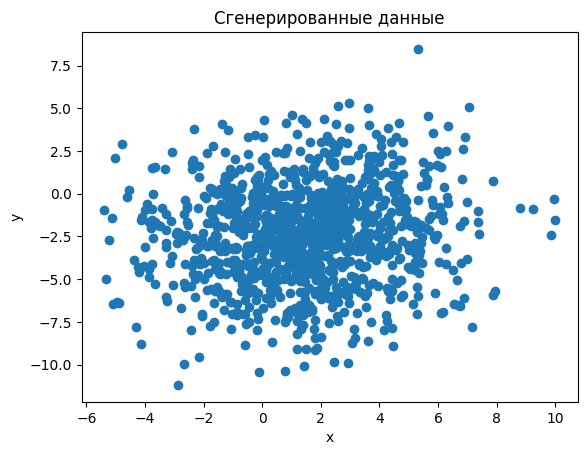

In [17]:
data = create_elipsoid_data(C1=1.5, C2=-2.5, S1=3, S2=2.5, theta=65, N=1100)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сгенерированные данные')
plt.show()

In [20]:
pca = PCA()

pca.fit(data)

eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

data_transformed = pca.transform(data)
max_value = np.max(data_transformed)
min_value = np.min(data_transformed)
print("Собственные векторы:\n", eigenvectors)
print("Собственные значения:\n", eigenvalues)
print("Максимальное значение в пространстве главных компонент:", max_value)
print("Минимальное значение в пространстве главных компонент:", min_value)

Собственные векторы:
 [[ 0.38952007  0.92101798]
 [ 0.92101798 -0.38952007]]
Собственные значения:
 [8.59446753 6.22432318]
Максимальное значение в пространстве главных компонент: 11.493817540239476
Минимальное значение в пространстве главных компонент: -9.806369785310721


4. Для набора данных Cars проанализируйте веса главных компонент при использовании числовых признаков. Какой из параметров вносит наименьший вклад в первую главную компоненту?

In [49]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./cars.csv', delimiter=',')

numeric_cols = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']
data = df[numeric_cols]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

pca = PCA()
pca.fit(data_scaled)
pca.components_

pc1_weights = pca.components_[0]
weights_df = pd.DataFrame({'feature': numeric_cols, 'PC1_weight': pc1_weights})

weights_df['PC1_weight'] = weights_df['PC1_weight'].abs()
print(weights_df.sort_values('PC1_weight'))

                feature  PC1_weight
2  Engine_capacity(cm3)    0.188220
1              Distance    0.452745
3           Price(euro)    0.580194
0                  Year    0.650361


# Глава 6

In [11]:
def distance(X1, X2, metric = 'euclidean', p = 2):
  if metric == 'euclidean':
    dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
  if metric == 'cityblock':
    dist = np.sum(np.abs(X1 - X2).T,axis=0)
  if metric == 'Chebyshev':
    dist = np.max(np.abs(X1 - X2).T,axis=0)
  if metric == 'Minkowski':
    dist = np.power(np.sum(np.power(np.
    abs(X1 - X2),p).T,axis=0),1/p)
  return dist

1. Оцените евклидово расстояние между векторами x1 {2, 5, 3 ,7} и x2 {2, 7, 1, 5}

In [12]:
distance(np.array([2, 5, 3, 7]), np.array([2, 7, 1, 5]), metric='euclidean')

np.float64(3.4641016151377544)

2. Оцените расстояние Чебышева между векторами x1 {0, 10, 4, 9} и x2 {3, 7, 0, 2}

In [13]:
distance(np.array([0, 10, 4, 9]), np.array([3, 7, 0, 2]), metric='Chebyshev')

np.int64(7)

3. Есть три центроида c1 {1, 0, 0}, c2 {0, 1, 1}, c3{1, 0, 1} и точка x с координатами {2, 0, 2}. К какому кластеру следует отнести эту точку при использовании евклидовой метрики расстояния?

In [14]:
def predict(X, n_clusters, centroids, metric = 'euclidean', p = 2):
  distances = np.zeros((X.shape[0], n_clusters))
  for i,centr in enumerate(centroids):
    distances[:,i] = distance(centr,X, metric, p)
  cluster_label = np.argmin(distances,axis = 1)
  return cluster_label

In [15]:
X = np.array([[2, 0, 2]])
centroids = np.array([[1, 0, 0], [0, 1, 1], [1, 0, 1]])
cluster_label = predict(X, 3, centroids)
print(cluster_label)

[2]


4. Как называется метод определения оптимального числа k (кластеров) с использованием анализа инерции?
- метод локтя (Elbow Method)